In [1]:
!cd scholar-master

/bin/bash: line 0: cd: scholar-master: No such file or directory


In [2]:
!pip install numpy scipy pandas matplotlib gensim os json


     |████████████████████████████████| 23.9 MB 3.9 MB/s eta 0:00:01
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [3]:
!pip install torch #version 1.8.1 not 0.4

     |████████████▉                   | 321.1 MB 142.1 MB/s eta 0:00:04

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |██████████████████████▏         | 556.4 MB 148.6 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |█████████████████████████████▋  | 742.9 MB 148.8 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 804.1 MB 5.3 kB/s 


In [10]:
import os
import json
with open(os.path.join('group_data.json')) as f:
    lines = f.readlines()
first_doc = json.loads(lines[0])
for key, value in first_doc.items():
    print(key, ':', value)

song : my-elusive-dreams
year : 1970
artist : bobby-vinton
genre : Pop
text : you followed me to texas, you followed me to utah, we didn't find it there, so we moved on. you followed me to alabama. things looked good in burmingham. we didn't find it there, so we moved on. i know your tired of following my elusive dreams and scheems. for there only fleeting things. my elusive dreams. you had my child in memphus. i heard of work in nashville. we didn't find it there. so we moved on. to farm in nebraska. to a gold mine in alaska. we didn't find it there. so we moved on. and now we've left alaska. because there was no gold mine. but this time, only two of us move on. now all we have is each other. and a little memory to cling to. and still you won't let me go on alone. i know your tired of following my elusive dreams and scheems. for there only fleeting things. my elusive dreams. for there only fleeting things. my elusive dreams.
sex : M
ents : (2.884654434066845, 4.161676646706587)
absolu

In [14]:
#import preprocess_data
#args = '-h'
#print("python preprocess_data.py -h")
#preprocess_data.main([args])

python preprocess_data.py -h
Usage: ipykernel_launcher.py train.jsonlist output_dir

Options:
  -h, --help            show this help message and exit
  --label=LABEL         field(s) to use as label (comma-separated):
                        default=none
  --test=TEST           Test data (test.jsonlist): default=none
  --train-prefix=TRAIN_PREFIX
                        Output prefix for training data: default=train
  --test-prefix=TEST_PREFIX
                        Output prefix for test data: default=test
  --stopwords=STOPWORDS
                        List of stopwords to exclude [None|mallet|snowball]:
                        default=snowball
  --min-doc-count=MIN_DOC_COUNT
                        Exclude words that occur in less than this number of
                        documents
  --max-doc-freq=MAX_DOC_FREQ
                        Exclude words that occur in more than this proportion
                        of documents
  --keep-num            Keep tokens made of only numbers

SystemExit: 0

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [37]:
import preprocess_data
script = 'preprocess_data.py'
args = 'group_data.json prep_new_data_trial --min-doc-count 20 --label sex,artist,genre,year,group --keep-alphanum True'
print("python", script, args)
preprocess_data.main(args.split())

python preprocess_data.py group_data.json prep_new_data_trial --min-doc-count 20 --label sex,artist,genre,year,group --keep-alphanum True
Using snowball stopwords
Reading data files
Found 119366 training documents
Found label sex with 2 classes
Found label artist with 5162 classes
Found label genre with 12 classes
Found label year with 47 classes
Found label group with 8 classes
Parsing 119366 documents
Size of full vocabulary=137144
Selecting the vocabulary
Vocab size after filtering = 18661
Final vocab size = 18661
Most common words remaining: know just like love now see got one time get
Converting to count representations
Size of train document-term matrix: (119366, 18661)
0 words missing from training data
Done!


In [11]:
# load the vocabualry
with open(os.path.join('prep_new_data_trial', 'train.vocab.json')) as f:
    vocab = json.load(f)
print("First few words in the vocbulary:")
print(vocab[100:150] + ['...'])

First few words in the vocbulary:
['808', '80s', '84s', '850', '8th', '900', '90s', '911', '9mm', '9th', 'aaa', 'aaaaah', 'aaaah', 'aaah', 'aah', 'aaliyah', 'aaron', 'abandon', 'abandoned', 'abc', 'abcs', 'abdomen', 'abe', 'abel', 'abide', 'abiding', 'abilene', 'abilities', 'ability', 'ablaze', 'able', 'aboard', 'abode', 'abort', 'abortion', 'abortions', 'abound', 'abracadabra', 'abraham', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'absolution', 'absorb', 'absorbed', 'abstract', 'absurd', 'abu', '...']


In [18]:
# load a covariate file
import pandas as pd
print("Start of a covariate file (train.year.csv):")
df_year = pd.read_csv(os.path.join('prep_new_data_trial', 'train.year.csv'), header=0, index_col=0)
print(df.head())

Start of a covariate file (train.year.csv):
   0  1  2  3  4  5  6  7
0  1  0  0  0  0  0  0  0
1  1  0  0  0  0  0  0  0
2  1  0  0  0  0  0  0  0
3  1  0  0  0  0  0  0  0
4  1  0  0  0  0  0  0  0


In [8]:
!pip install gensim

  Using cached gensim-4.0.1-cp37-cp37m-manylinux1_x86_64.whl (23.9 MB)
     |████████████████████████████████| 56 kB 563 kB/s eta 0:00:011


In [9]:
import run_scholar
script = 'run_scholar.py'
args = 'prep_new_data_trial -k 10 --epochs 50 --dev-folds 10 --seed 42 --labels sex -o simple'
print("python", script, args)
run_scholar.main(args.split())

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


python run_scholar.py prep_new_data_trial -k 10 --epochs 50 --dev-folds 10 --seed 42 --labels sex -o simple
Loading data
Loaded 119366 documents with 18661 features
Found 119356 non-empty documents
Loading labels from prep_new_data_trial/train.sex.csv
Found 2 labels
Train label proportions: [0.27682731 0.72317269]
Computing background frequencies
Min/max word counts in training data: 14 180396
Network architecture:
embedding_dim: 300
n_topics: 10
vocab_size: 18661
label_type: None
n_labels: 2
n_prior_covars: 0
n_topic_covars: 0
l1_beta_reg: 0.0
l1_beta_c_reg: 0.0
l1_beta_ci_reg: 0.0
l2_prior_reg: 0.0
classifier_layers: 1
use_interactions: False
Optimizing full model
Epoch: 10 ; cost = 894.898573447 ; training accuracy (noisy) = 0.719449642
Epoch: 10; Dev perplexity = 1403.9571; Dev accuracy = 0.7215
Epoch: 20 ; cost = 897.992596944 ; training accuracy (noisy) = 0.722754396
Epoch: 20; Dev perplexity = 1420.9598; Dev accuracy = 0.7220
Epoch: 30 ; cost = 901.114146007 ; training accuracy 

In [30]:
#import json
#import numpy as np

# load the background log-frequencies
#bg = np.load('output/bg.npz')['bg']

# load the vocabualry
#with open('output/vocab.json') as f:
#    vocab = json.load(f)

# sort terms by log-frequency
#order = np.argsort(bg)

# print the most common words 
#for i in range(1, 16):
#    index = order[-i]
#    print(vocab[index], np.exp(bg[index]))

love 0.013648898
like 0.013435767
know 0.0127327265
just 0.011439456
got 0.009691311
get 0.009436867
now 0.00863577
one 0.0071266405
see 0.00683996
time 0.0066750953
baby 0.0066231936
never 0.0064957803
want 0.0061679427
yeah 0.0060709454
cause 0.005998689


In [32]:
#from run_scholar import print_top_words

# load the stored (K x V) topic matrix (stored in a compressed numpy format)
#beta = np.load(os.path.join('output', 'beta.npz'))['beta']
#print_top_words(beta, vocab, n_pos=10, n_neg=10);

0: mistakes believing nothings pieces answers yesterday survive mend losing fading  / brown dick puerto wit chicken corn mack fat french mama ; sparsity=0.0000
1: babe baby lovin ooh love darling darlin loving arms kiss  / rapper rappers hoes son dick trunk uncle rims nuts pen ; sparsity=0.0000
2: yuh nuh inna dem seh waan haffi tek deh pon  / memory goodbye tears knew loved shared dreaming felt audemar thinking ; sparsity=0.0001
3: thy shepherds redeeming rejoices thee proclaim radiant infant bethlehem hosts  / ass gotta dick shit bitch fuckin fuck doin nigga aint ; sparsity=0.0000
4: yuletide chestnuts nipping tots sleigh carols eskimos christmas merry mistletoe  / fuckin fuck ass shit bust outta spit motherfuckin wit dick ; sparsity=0.0000
5: tennessee cowboy lonesome highway railroad train blues freight river whiskey  / fuck nigga niggas rappers shit wit verse bitches flipmode bitch ; sparsity=0.0000
6: shawty vip club sexy booty gucci shorty pussy prada mami  / cry cried tears die

In [ ]:
SECOND MODEL, SEX AS LABEL, GROUPS AS COVAR

In [39]:
#adding covars
import run_scholar
script = 'run_scholar.py'
args = 'prep_new_data_trial -k 15 --epochs 80 --dev-folds 10 --seed 88 --topic-covars group --labels sex --interactions'
print("python", script, args)
run_scholar.main(args.split())

python run_scholar.py prep_new_data_trial -k 15 --epochs 80 --dev-folds 10 --seed 88 --topic-covars group --labels sex --interactions
Loading data
Loaded 119366 documents with 18661 features
Found 119356 non-empty documents
Loading labels from prep_new_data_trial/train.sex.csv
Found 2 labels
Loading covariates from prep_new_data_trial/train.group.csv
Train label proportions: [0.27682731 0.72317269]
Computing background frequencies
Min/max word counts in training data: 15 180454
Network architecture:
embedding_dim: 300
n_topics: 15
vocab_size: 18661
label_type: None
n_labels: 2
n_prior_covars: 0
n_topic_covars: 8
l1_beta_reg: 0.0
l1_beta_c_reg: 0.0
l1_beta_ci_reg: 0.0
l2_prior_reg: 0.0
classifier_layers: 1
use_interactions: True
Optimizing full model
Epoch: 10 ; cost = 890.232533508 ; training accuracy (noisy) = 0.720920490
Epoch: 10; Dev perplexity = 1341.4011; Dev accuracy = 0.7234
Epoch: 20 ; cost = 887.535381084 ; training accuracy (noisy) = 0.721227693
Epoch: 20; Dev perplexity = 1

In [56]:
beta = np.load('output/beta.npz')['beta']
print_top_words(beta, vocab, n_pos=10, n_neg=10);

0: autumn reverie september bluebirds stardust spring dwindle april melody moonlit  / gotta money outta dirty sex system yeah goodies sick nipping ; sparsity=0.0000
1: cmere underwood pedestrians aynsley flunk estrada zappa sherwood keyboards vocals  / yuh inna waan mek weh krayzie weary layzie cry oer ; sparsity=0.0001
2: bethlehem exultation manger christ choirs shepherds hark joyful praises unto  / niggas ass shots shit jeans bitch ammo tires motherfucker truck ; sparsity=0.0000
3: ooh lovin desire doo loves babe higher love fever sweeter  / dem police dans cris wid caan fucked retarded packed dung ; sparsity=0.0000
4: georgia tennessee blues lonesome railroad memphis country nashville honky ramblin  / lyrical fucking mic rappers rapper fuck tots chestnuts diss yuletide ; sparsity=0.0000
5: pum bang rum rummy tums killah lox kiddie toddle bwoy  / wonderful nipping yuletide paradise beautiful christmases moments moment harmony ciel ; sparsity=0.0001
6: playa ballin yup vvs bezel fash

In [57]:
topic_covars = np.load(os.path.join('output', 'beta_c.npz'))
weights = topic_covars['beta']
names = topic_covars['names']
print_top_words(weights, vocab, topic_names=names, n_pos=10, n_neg=0);

0: gordon silks chews scientists dykes pleading leprechaun poo stroked fusion ; sparsity=0.0000
1: farce united walkie africans pagan dawns germs become babylon angry ; sparsity=0.0000
2: jerome favourite hummin pulse guessed exists fashionable bubbling homer bin ; sparsity=0.0000
3: barricade raoul hobo francs bravo christine leaped cleverly trooper cruel ; sparsity=0.0000
4: adrock mca fadeout shamrock openly potnah vallejo irish slanted groovin ; sparsity=0.0000
5: muthaphukkin youe charli cakin wheezy baboon deux edi janet savoir ; sparsity=0.0000
6: pum triumphant javais syne noel tout tes lowell puis auld ; sparsity=0.0000
7: commas 1738 ayy fetty hotline forreal zoovier dex bando shineth ; sparsity=0.0001


5
wouldn't it be nice if we were older? then we wouldn't have to wait so long and wouldn't it be nice to live together in the kind of world where we belong you know it's gonna make it that much better when we can say goodnight and stay together wouldn't it be nice if we could wake up in the morning when the day is new? and after having spent the day together hold each other close the whole night through happy times together we've been spending i wish that every kiss was never ending wouldn't it be nice? maybe if we think, and wish, and hope, and pray, it might come true baby, then there wouldn't be a single thing we couldn't do we could be married and then we'd be happy wouldn't it be nice? you know it seems the more we talk about it it only makes it worse to live without it but let's talk about it wouldn't it be nice?


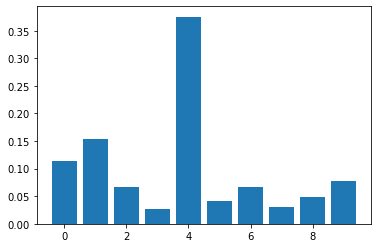

In [29]:
#visualize
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the matrix with topic proportions for each document (note that this excludes those in the dev set).
npz = np.load(os.path.join('simple', 'theta.train.npz')) 
ids = npz['ids']
theta = npz['theta']
n_docs, n_topics = theta.shape

index = 5
# plot the proportion of each topic in the first document
fig, ax = plt.subplots()
ax.bar(range(n_topics), theta[index, :])

# find the original line corresponding to this document, and display the text
print(ids[index])
for line in lines:
    doc = json.loads(line)
    if doc['id'] == ids[index]:
        print(doc['text'])
        break


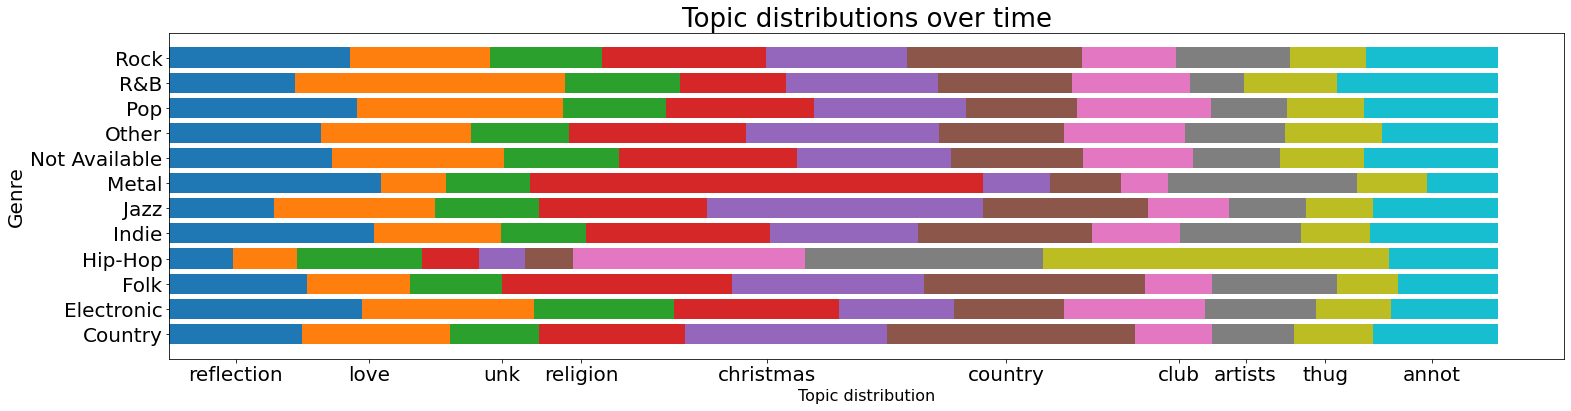

In [121]:

# load the senator variable for all the documents
groups_df = pd.read_csv(os.path.join('prep_new_data_trial', 'train.genre.csv'), header=0, index_col=0)
groups = groups_df.columns

# pull out a subset corresponding to the ids from above
train_subset = groups_df.loc[ids]
n_docs, n_groups = train_subset.shape

# plot the average senator-topic proportions
fig, ax = plt.subplots( figsize=(25,6))
lefts = np.zeros(n_groups)
for k in range(n_topics):
    vals = []
    for group in groups:
        vals.append(np.mean(theta[train_subset[group] == 1, k]))

    ax.barh(range(n_groups), vals, left=lefts)
    lefts += np.array(vals)

ax.set_yticks(range(n_groups))
ax.set_yticklabels(groups, fontsize = 20)
ax.set_ylabel('Genre', size = 20)
ax.set_xlabel('Topic distribution', size = 16)
ax.set_xticks([0.05, 0.15, 0.25, 0.31, 0.45,0.63, 0.76,0.81,0.87,0.95])
#ax.set_yticklabels(['1970-77', '1977-82','1982-87','1987-92', '1992-97','1997-01','2001-14', '2014-16'], fontsize = 20)
ax.set_xticklabels(['reflection', 'love','unk','religion', 'christmas','country','club', 'artists', 'thug','annot'], fontsize = 20)
                 
plt.title('Topic distributions over time', size = 26)
#[t.set_color(i) for (i,t) in
# zip(['blue','orange','green','red','purple','brown','pink','grey','olive','cyan'],ax.xaxis.get_ticklabels())]
#ax.tick_params(axis='x', colors=zip['blue','orange','green','red','purple','brown','pink','grey','olive','cyan'])
#[t.set_color(zip['blue','orange','green','red','purple','brown','pink','grey','olive','cyan']) for t in ax.xaxis.get_ticklabels()]
plt.show();

In [ ]:
#--------ANOTHER MODEL
#adding covars
import run_scholar
script = 'run_scholar.py'
args = 'prep_new_data_trial -k 15 --epochs 50 --dev-folds 10 --seed 88 --topic-covars group --labels sex --interactions'
print("python", script, args)
run_scholar.main(args.split())

python run_scholar.py prep_new_data_trial -k 15 --epochs 50 --dev-folds 10 --seed 88 --topic-covars group,artist --labels sex --interactions
Loading data
Loaded 119366 documents with 18661 features
Found 119356 non-empty documents
Loading labels from prep_new_data_trial/train.sex.csv
Found 2 labels
Loading covariates from prep_new_data_trial/train.group.csv
Loading covariates from prep_new_data_trial/train.artist.csv
Train label proportions: [0.27682731 0.72317269]
Computing background frequencies
Min/max word counts in training data: 15 180454
Network architecture:
embedding_dim: 300
n_topics: 15
vocab_size: 18661
label_type: None
n_labels: 2
n_prior_covars: 0
n_topic_covars: 5170
l1_beta_reg: 0.0
l1_beta_c_reg: 0.0
l1_beta_ci_reg: 0.0
l2_prior_reg: 0.0
classifier_layers: 1
use_interactions: True
Optimizing full model
Epoch: 10 ; cost = 778.961845566 ; training accuracy (noisy) = 0.721413876
Epoch: 10; Dev perplexity = 1644.5771; Dev accuracy = 0.7245
Epoch: 20 ; cost = 769.139262034 